In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from engine import Value
from visualize import draw_dot

### A Simple Mathematical Expression

In [3]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b
e.label = 'e' 
d = e + c
d.label = 'd'
f = Value(-2.0, label='f')
L = d * f 
L.label = 'L'

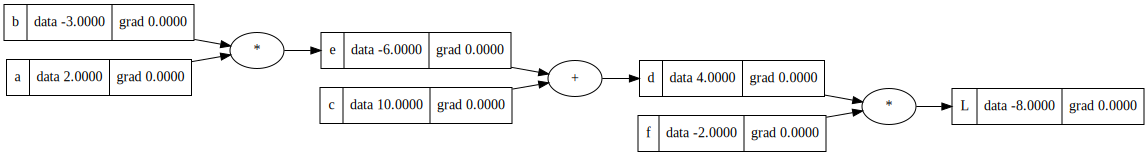

In [4]:
draw_dot(L)

### A single neuron

In [14]:
# Inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# Create two weight nodes, w1 and w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# Create a bias node, b
b = Value(6.88137, label='b')

# Multiply the inputs and weights
x1w1 = x1 * w1; x1w1.label = 'x1w1'
x2w2 = x2 * w2; x2w2.label = 'x2w2'
# Add the weighted inputs together
x1w1_plus_x2w2 = x1w1 + x2w2; x1w1_plus_x2w2.label = 'x1w1 + x2w2'

# Add the bias
n = x1w1_plus_x2w2 + b; n.label = 'x1w1 + x2w2 + b'

# Apply the activation function, tanh
# o = n.tanh(); o.label = 'o'

e = (2*n).exp()
o = (e - 1) / (e + 1)
o.label = 'o'
o.backward()



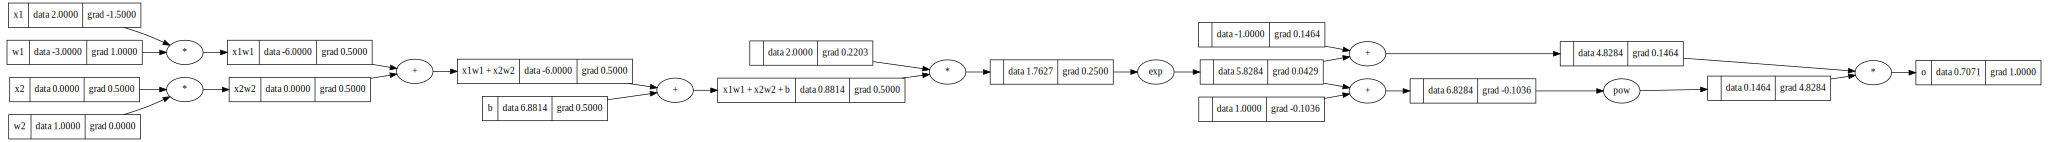

In [15]:
draw_dot(o)

In [8]:
o.grad = 1.0
o._backward()
n._backward() # will route the gradient to x1w1, x2w2, and b   
b._backward() 
x1w1_plus_x2w2._backward()
x1w1._backward()
x2w2._backward()

In [9]:
o.backward()

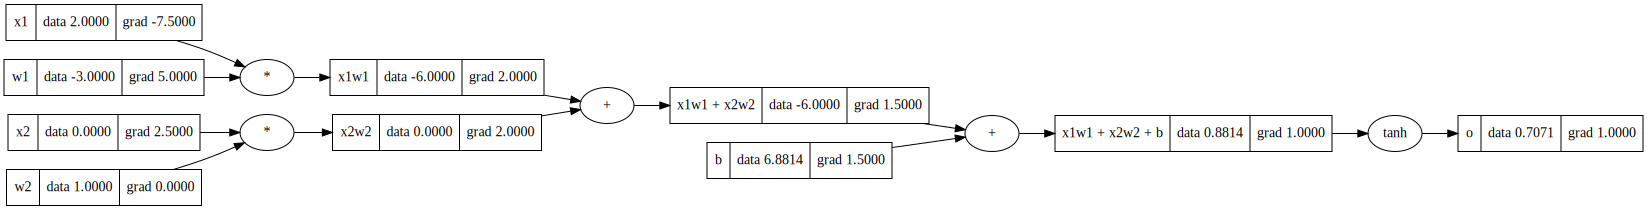

In [10]:
draw_dot(o)

In [11]:
a = Value(2.0, label='a')
b = Value(4.0, label='b')

a / b

Value(data=0.5)

In [12]:
x1w1_plus_x2w2.data

-6.0

In [13]:
x1w1_plus_x2w2

Value(data=-6.0)

### Neural Network Implementation

In [5]:
from nn import Neuron, Layer, MLP

In [4]:
x = [2.0, 3.0]

In [48]:
n = Neuron(2)
n(x)

Value(data=0.18699914677767993)

In [49]:
l = Layer(2, 3)
l(x)

[Value(data=0.5806159713740379),
 Value(data=-0.9294142952739468),
 Value(data=0.6224457703046007)]

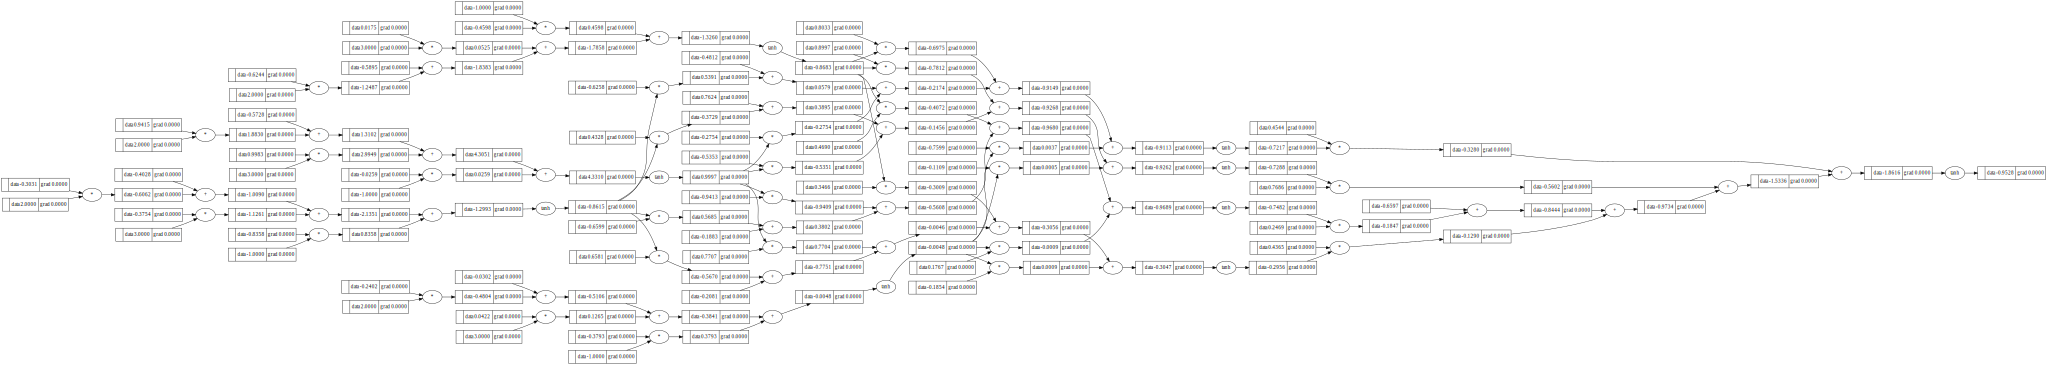

In [6]:
x = [2.0, 3.0, -1.0]
m = MLP(3, [4, 4, 1])
t = m(x)
draw_dot(t)

### Create Small data set, train NN

In [7]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]

ys = [1.0, -1.0, -1.0, 1.0]


In [32]:
ypred = [m(x) for x in xs]

In [33]:
loss = sum([(yout - ygt)**2 for yout, ygt in zip(ypred, ys)])
loss

Value(data=7.388096334304905)

In [21]:
loss.backward()

In [26]:
m.layers[0].neurons[0].w[0].grad

-0.31678845659671667

In [29]:
# draw_dot(loss)

In [ ]:
loss = sum([(yout - ygt)**2 for yout, ygt in zip(ypred, ys)])
loss

In [30]:
m.parameters()

[Value(data=-0.30309147238906187),
 Value(data=-0.37535935949493804),
 Value(data=-0.8357912990386678),
 Value(data=-0.402791269668457),
 Value(data=0.9414882370415827),
 Value(data=0.998313797793331),
 Value(data=-0.02588783583207288),
 Value(data=-0.5727791232338626),
 Value(data=-0.6243646892941106),
 Value(data=0.017500950794444803),
 Value(data=-0.4597808417527576),
 Value(data=-0.5895465778256375),
 Value(data=-0.24018902913204654),
 Value(data=0.042154207268995325),
 Value(data=-0.37933140344236693),
 Value(data=-0.030230459202940985),
 Value(data=-0.6598775881892622),
 Value(data=-0.9412611981856518),
 Value(data=0.46903523560616334),
 Value(data=0.17673209655089273),
 Value(data=-0.18832436996284763),
 Value(data=0.6580744564187588),
 Value(data=0.7706873018159204),
 Value(data=0.34659301687528754),
 Value(data=-0.18535506066242946),
 Value(data=-0.20811508972917325),
 Value(data=0.4328113574774137),
 Value(data=-0.5352674516044602),
 Value(data=0.8997027094776624),
 Value(dat

* The gradient tells us what happens to the loss if we *nudge* the parameter in the positive direction. 
* So, if the gradient is positive, it says if you nudge you parameter in the positive direction the loss will increase. We always want our loss to decrease, so we if the gradient is positive, we want to slightly decrease the parameter.
* If the gradient is negative, we will want to increase out parameter (so that it yields a decrease in the loss)
* So we can do:
```
data = data + lr * (-grad)
```

In [31]:
for p in m.parameters():
    p.data += -(0.01*p.grad) 

In [40]:
m = MLP(3, [4, 4, 1])

# Training loop to reduce loss
for i in range(100):
    # Forward pass
    ypred = [m(x) for x in xs]
    loss = sum([(yout - ygt)**2 for yout, ygt in zip(ypred, ys)])
    
    # Backward pass
    for p in m.parameters():
        p.grad = 0.0
    loss.backward()

    # Update parameters
    for p in m.parameters():
        p.data += -(0.01*p.grad) 

    print(loss.data)

ypred = [m(x) for x in xs]
print(ypred)

4.187908106819075
3.542301703099155
2.9334193744337735
2.4296050175017583
2.0496411788425126
1.7710488848052772
1.5614109070031956
1.3957530790595356
1.2586529191872924
1.1413586888041365
1.03895803340597
0.9485667950513016
0.8683291669561213
0.7969070320619582
0.7332338884532087
0.6764023993418213
0.6256152468098878
0.5801637870572695
0.5394176949595624
0.5028182570767512
0.46987248349595506
0.440147195913176
0.4132630257041714
0.3888884918964423
0.36673434846051345
0.3465483393931923
0.328110438925199
0.3112286038341574
0.29573502968153187
0.2814828810983815
0.2683434546889219
0.25620372850490825
0.24496425183443887
0.23453733142157374
0.22484547395415067
0.21582004893299372
0.2074001403821607
0.19953156000024447
0.19216599814451568
0.18526029242412456
0.17877579664695686
0.1726778354364802
0.16693523204380098
0.16151989876576134
0.15640648098264415
0.15157204718741846
0.14699581852751503
0.1426589323511174
0.13854423507009508
0.13463610034445914
0.13092026917863353
0.127383709014891